In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pdb
import pickle
from scipy import stats
import math
import seaborn as sns
import vectorized_RG as RG
from ipywidgets import interact
from IPython.core.display import display, HTML
import winsound

### Debugging
pdb.set_trace() debugging mode will be entered when a worm has negative energy
1. "n" ENTER runs the next line in the program
2. "q" ENTER quits/crashes the program
3. "p" (variable) ENTER prints out the variable
4. "c" ENTER continues running the program

[Debugging in Python](https://pythonconquerstheuniverse.wordpress.com/2009/09/10/debugging-in-python/)

### Code Timer
%load_ext line_profiler

%lprun -f run run(1)

In [2]:
cd "D:/experiments/exp_6_version_1_run_1/

D:\experiments\exp_6_version_1_run_1


set the working directory

In [3]:
time_saved = [1,250,500,1000,1500,2000,5000,10000,20000,30000]

In [4]:
my_data = [RG.open_pickle(i) for i in time_saved]

In [5]:
RG.which_gen(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["par"])

This is generation number 193


In [6]:
def worm_map(time=0):
    RG.worm_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"], map_type="dauer")

interact(worm_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

In [7]:
def gender_map(time=0):
    RG.gender_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(gender_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

male data is translucent and on top, so covers over female data a bit in those locations

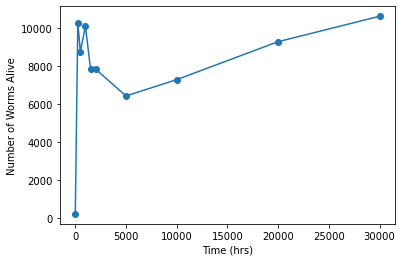

In [8]:
RG.worms_alive(time_saved, my_data)

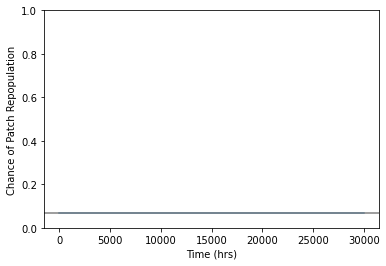

In [9]:
RG.patch_repop(my_data[-1]["par"])

In [10]:
def food_map(time=0):
    RG.food_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(food_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

In [11]:
def num_gender(time=0):
    RG.num_gender(my_data[time]["par"], my_data[time]["g_to_i"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_gender, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

In [12]:
def num_stage(time=0):
    RG.num_stage(my_data[time]["i_to_s"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_stage, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

chance of dying in each stage
L1 : 0.677581195837419
L2 : 0.15247010759504817
L2d : 0.23902897415818325
L3 : 0.16586639365241873
dauer : 0.9700020602052775
L4 : 0.21865481449696544
adult : 0.8760942046178245


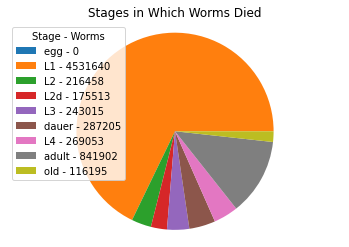

In [13]:
display(HTML("<style>div.output_scroll { height: 30em; }</style>"))
RG.frac_dead(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Average Time Spent Per Stage (hrs)
L1 10.876
L2 10.045
L2d 15.602
L3 10.093
dauer 2799.644
L4 13.34
adult 84.811
old 117.648


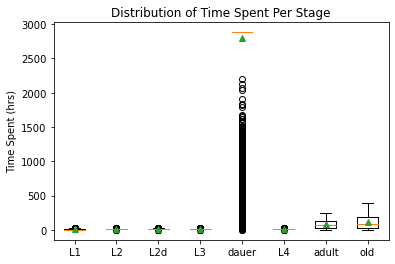

In [14]:
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
L2d_avg = RG.stage_time(my_data[-1]["stage_list"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

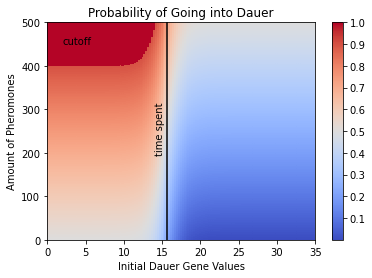

In [15]:
RG.prob_dauer(my_data[-1]["par"], L2d_avg)

In [16]:
def stats_d(time=0):
    RG.stats_d(my_data[time]["p_to_i"], my_data[time]["array"], my_data[time]["par"], L2d_avg)

interact(stats_d, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

In [17]:
def stats_s(time=0):
    RG.stats_s(my_data[time]["p_to_i"], my_data[time]["array"])

interact(stats_s, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

x axis limits include travel direction genes from 0.25 - 0.75

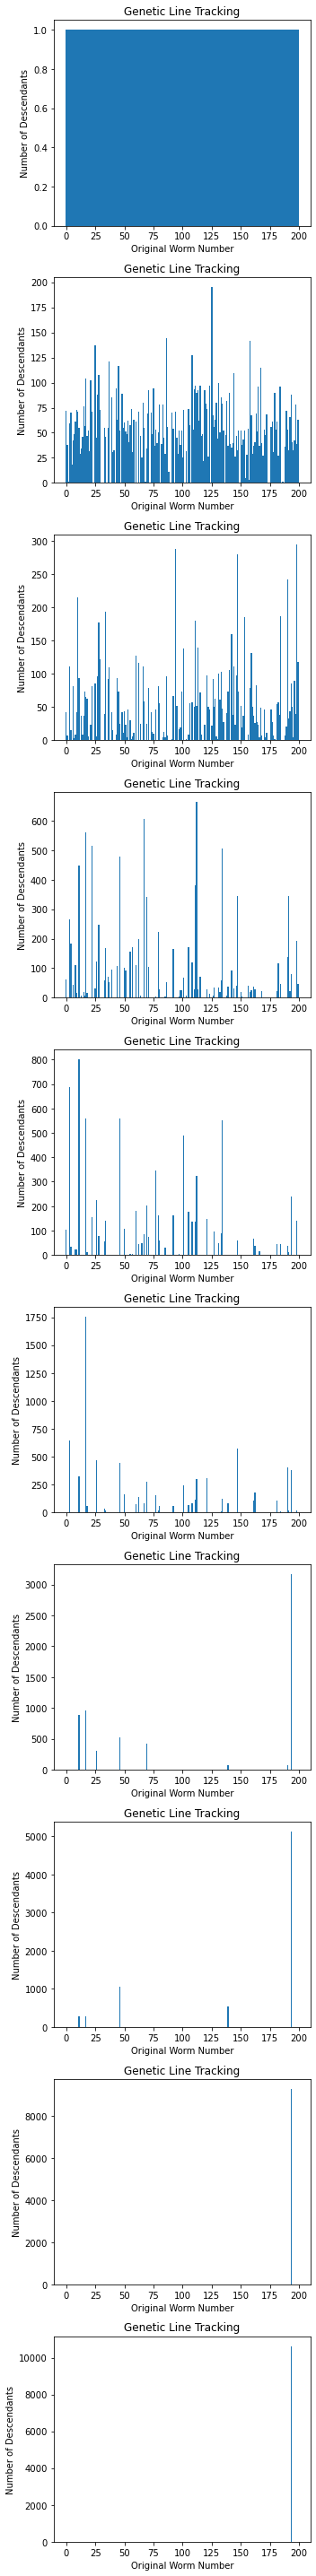

In [18]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.stats_g(my_data[i]["par"], my_data[i]["p_to_i"], my_data[i]["array"])
plt.tight_layout()

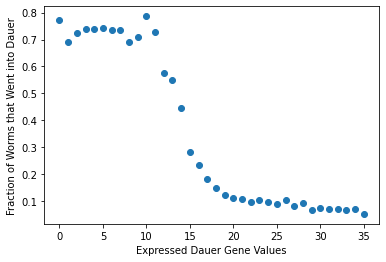

In [19]:
RG.frac_dauer(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

fraction of worms that went into dauer = the number of worms that went into dauer / the total number of worms that went into either L3 or dauer

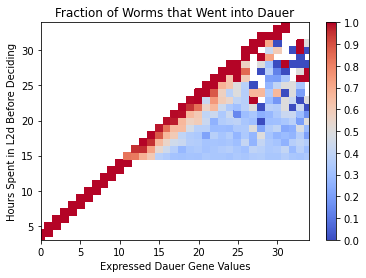

In [20]:
RG.frac_dauer_map(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

- only includes worms that made it through L2d and not ones that went through L2
- white spaces indicate there are no worms with that combination

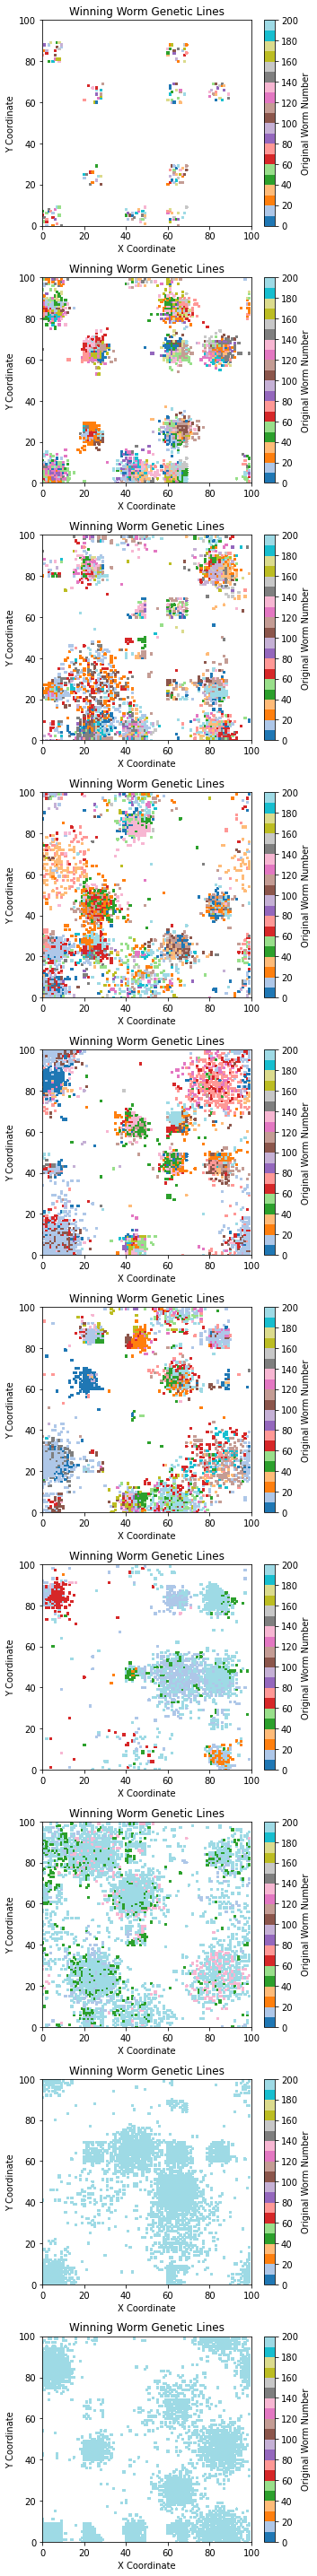

In [21]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.genetic_line_map(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

In [22]:
def dauer_line(time=0):
    RG.dauer_line(my_data[time]["array"], my_data[time]["p_to_i"], my_data[time]["s_to_i"], my_data[time]["par"])

interact(dauer_line, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=9), Output()), _dom_classes=('widget-interact…

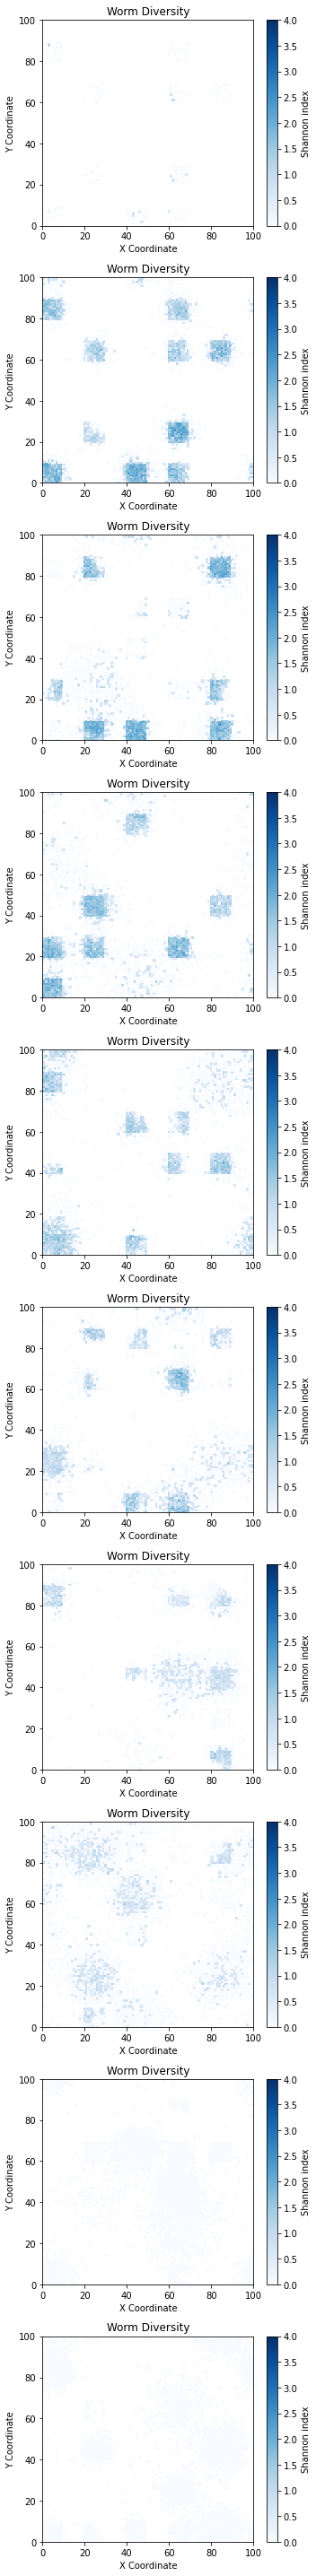

In [23]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.diversity(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

the limit of Shannon index values is from 0 to 4

C:\Users\Rachel\Documents\Rachel\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Rachel\Documents\Rachel\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


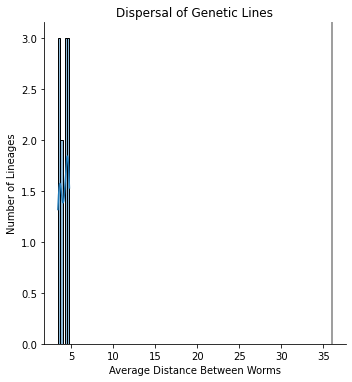

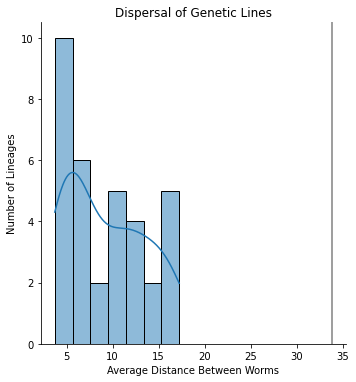

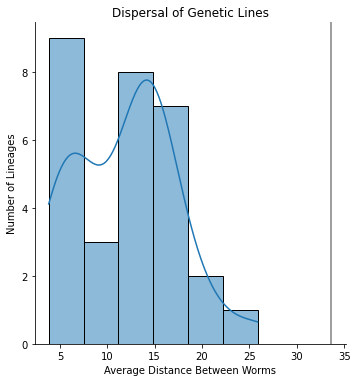

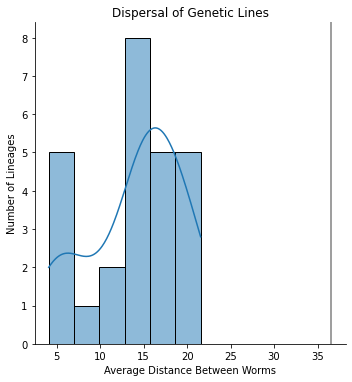

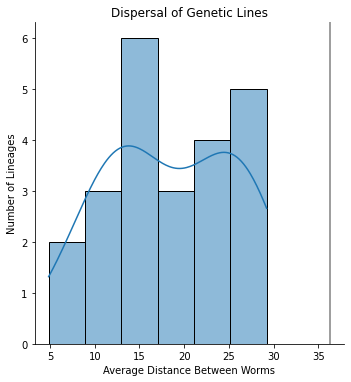

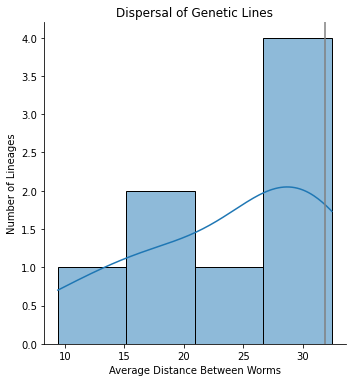

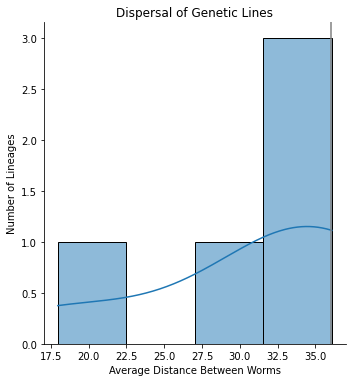

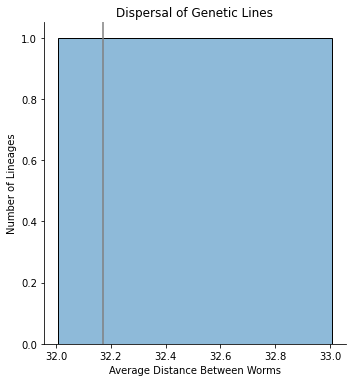

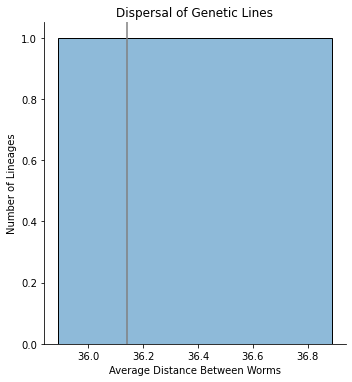

In [24]:
for i in range(1,len(time_saved)):
    RG.clump(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])

clumpiness of each lineage with more than 1% of living worms vs. clumpiness of a random sample of the population

In [25]:
RG.winner(time_saved, my_data)

Time (hrs) : Winning Lineage

1 : 0
250 : 125
500 : 198
1000 : 112
1500 : 11
2000 : 17
5000 : 193
10000 : 193
20000 : 193
30000 : 193


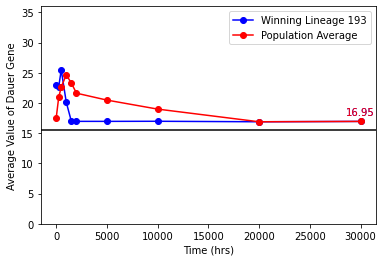

In [26]:
RG.dauer_over_time(my_data[-1]["par"], L2d_avg, time_saved, my_data)

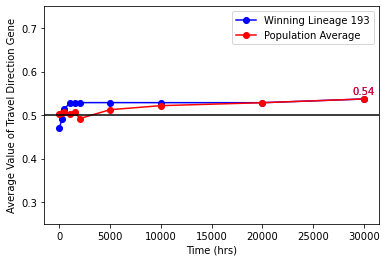

In [27]:
RG.smell_over_time(time_saved, my_data)

y axis limits include travel direction genes from 0.25 - 0.75

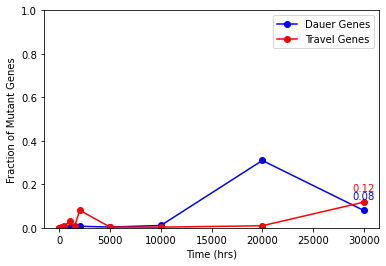

In [28]:
RG.mutation(time_saved, my_data)

- fraction of mutant genes = the number of genes NOT in the original population / the total number of genes
- only look at the genes of living worms

In [29]:
winsound.Beep(1800,500)